In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

# INTRODUCTION

The Superstore dataset provides sales data for a variety of products across different categories and regions.
The goal of this project is to analyze the data and identify insights that can help the company improve its business performance.
Specifically, we aim to answer questions such as: which product categories are the most profitable? Which regions have the highest sales and profit? What are the most profitable products?By answering these questions, we hope to provide recommendations for the company on how to optimize its product offerings and improve its revenue and profitability.

**STEPS**

1. Data Cleaning
2. Data Exploration
3.  Data Analysis
4.  Data Interpretation & Visualization
5.  Storytelling




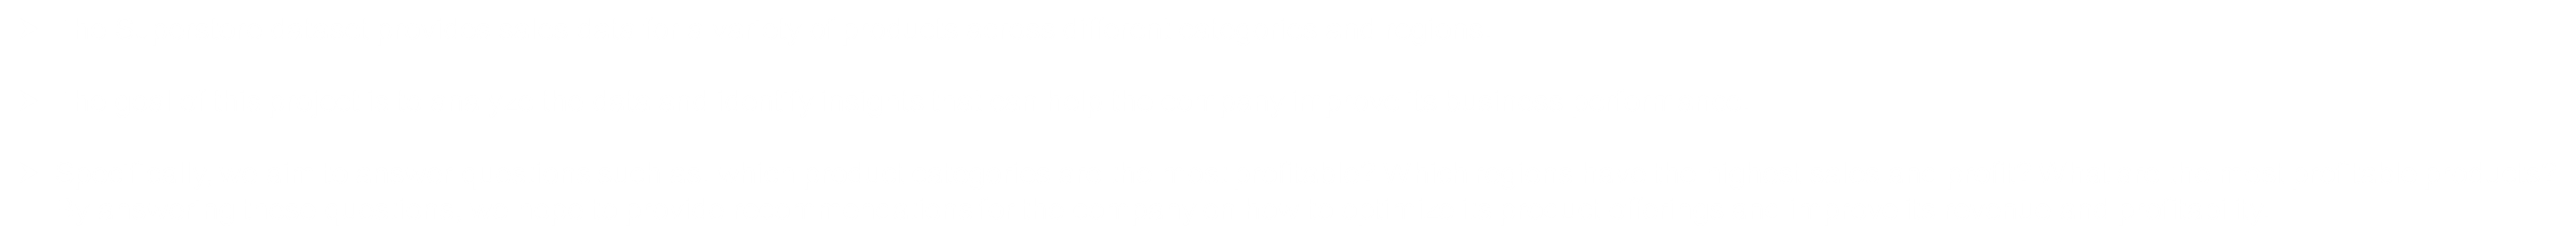
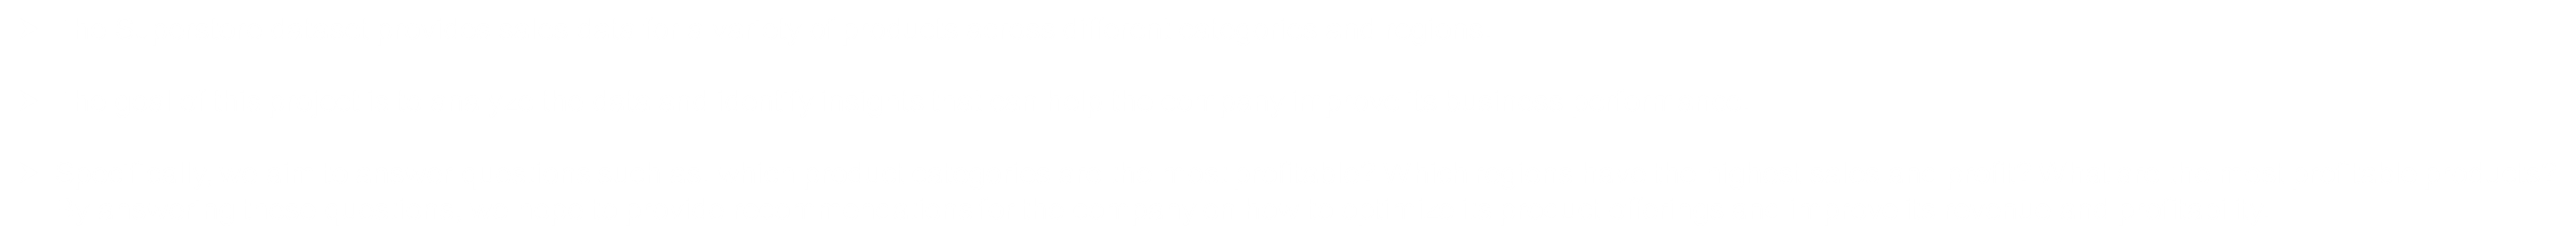
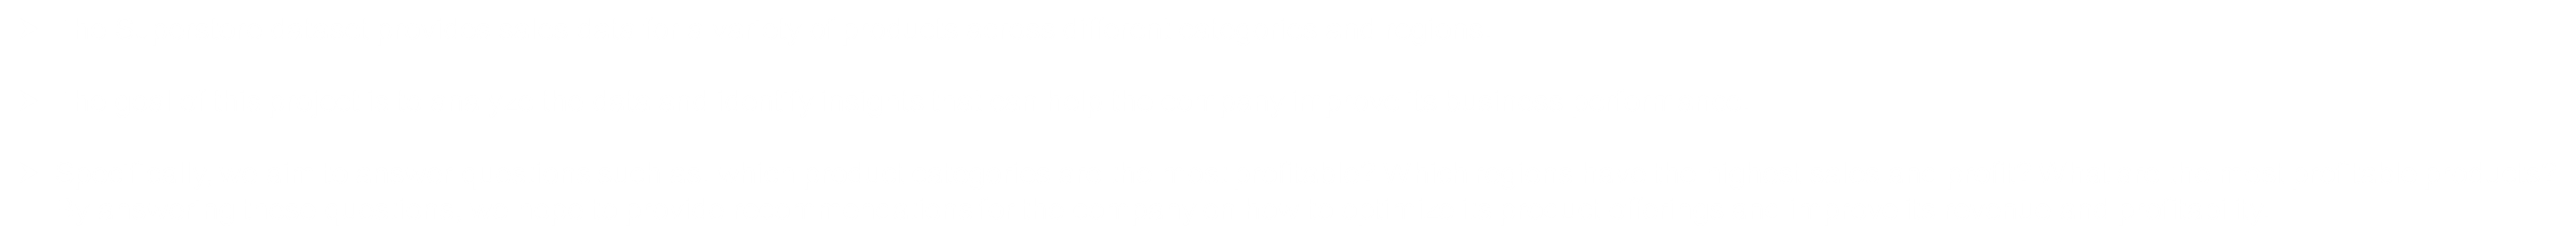
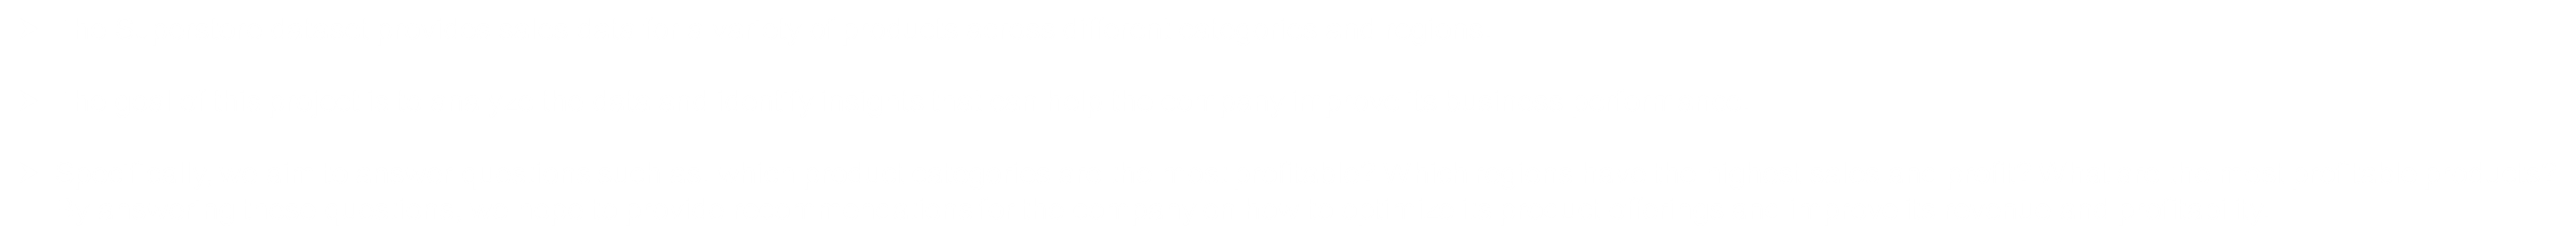

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#data overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
#check for duplicants
if df.duplicated().sum() >0:
    print('Duplicants are present') 
else: print('No duplicates present')

No duplicates present


**Exploratory Analysis**

**Customer Analysis**

In [8]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [9]:
#customer segregation

types_of_customers = df['Customer type'].unique()
print(types_of_customers)

['Member' 'Normal']


In [10]:
#number of customers in each category

number_of_customers = df['Customer type'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'count':'Total Customers'})
print(number_of_customers)

  Customer type  Total Customers
0        Member              501
1        Normal              499


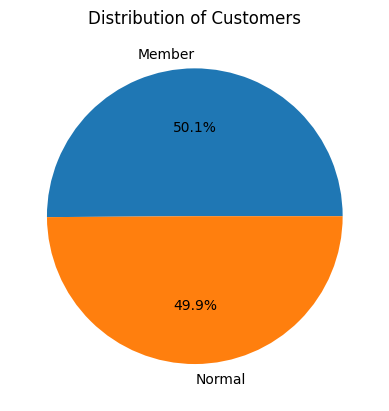

In [11]:
#Pie Chart

plt.pie(number_of_customers['Total Customers'],labels=number_of_customers['Customer type'],autopct='%1.1f%%')

plt.title('Distribution of Customers')

plt.show()

**Customers & Sales**


In [12]:
sales_per_category = df.groupby('Customer type')['Total'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={'Total':'Total_Sales'})

print(sales_per_category)

  Customer type  Total_Sales
0        Member   164223.444
1        Normal   158743.305


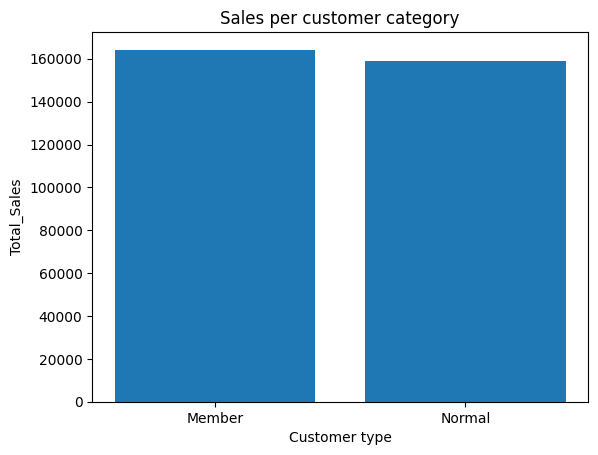

In [13]:
#Bar graph
plt.bar(sales_per_category['Customer type'],sales_per_category['Total_Sales'])

#labels
plt.title('Sales per customer category')
plt.xlabel('Customer type')
plt.ylabel('Total_Sales')

plt.show()

In [14]:
#Group data according to; customer type, gender and sales

Customer_sales = df.groupby(['Customer type','Gender'])['Total'].sum().reset_index()

#sort in descending order

top_spenders = Customer_sales.sort_values(by='Total', ascending=False)

print(top_spenders.head(10).reset_index(drop=True))

  Customer type  Gender       Total
0        Member  Female  88146.9435
1        Normal  Female  79735.9815
2        Normal    Male  79007.3235
3        Member    Male  76076.5005


In [15]:
#frequently used payment method (mode)

payment_mode = df['Payment'].value_counts().reset_index()
payment_mode = payment_mode.rename(columns={'index':'Mode of payment','count':'Use frequency'})

print(payment_mode)

       Payment  Use frequency
0      Ewallet            345
1         Cash            344
2  Credit card            311


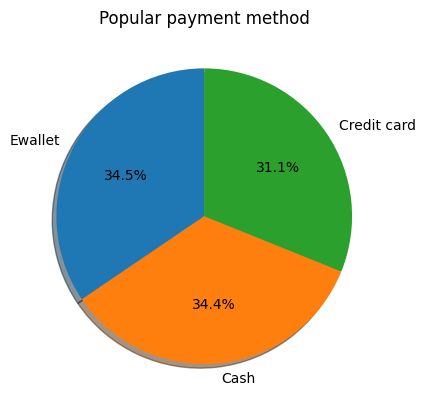

In [16]:
#pie chart

plt.pie(payment_mode['Use frequency'],labels = payment_mode['Payment'], autopct='%1.1f%%', shadow=True, startangle=90)

#labels
plt.title('Popular payment method')

plt.show()

**Geographical Analysis**

In [17]:
#customers per city
city = df['City'].value_counts().reset_index()
city= city.rename(columns={'index':'City','City':'Number of Customers'})

print(city)


  Number of Customers  count
0              Yangon    340
1            Mandalay    332
2           Naypyitaw    328


In [18]:
#sales per city

city_sales = df.groupby(['City'])['Total'].sum().reset_index()
high_city_sales = city_sales.sort_values(by='Total', ascending=False)

print(high_city_sales.head())

        City        Total
1  Naypyitaw  110568.7065
2     Yangon  106200.3705
0   Mandalay  106197.6720


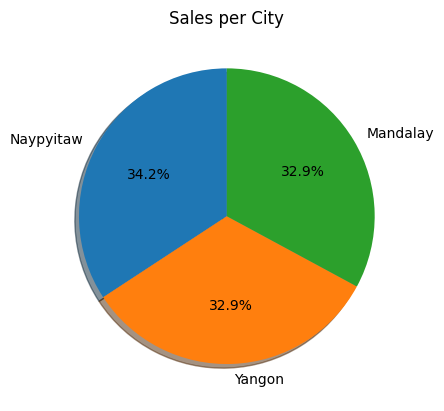

In [19]:
#sales per city
plt.pie(high_city_sales['Total'],labels = high_city_sales['City'], autopct='%1.1f%%', shadow=True, startangle=90)

#labels
plt.title('Sales per City')

plt.show()

**Product analysis**

In [20]:
#product categories

product_categories=df['Product line'].unique()
print(product_categories)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [21]:
#product line & customer gender

product_buyer = df.groupby(['Product line'])['Gender'].sum().reset_index()
print(product_buyer)

             Product line                                             Gender
0  Electronic accessories  FemaleMaleFemaleMaleFemaleMaleMaleFemaleFemale...
1     Fashion accessories  FemaleMaleFemaleMaleFemaleFemaleMaleFemaleMale...
2      Food and beverages  FemaleMaleMaleFemaleFemaleFemaleFemaleMaleFema...
3       Health and beauty  FemaleMaleFemaleFemaleFemaleMaleMaleMaleFemale...
4      Home and lifestyle  MaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMa...
5       Sports and travel  MaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFema...


In [22]:
#sales per product category

category_sales = df.groupby(['Product line'])['Total'].sum().reset_index()
print(category_sales)

             Product line       Total
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
2      Food and beverages  56144.8440
3       Health and beauty  49193.7390
4      Home and lifestyle  53861.9130
5       Sports and travel  55122.8265


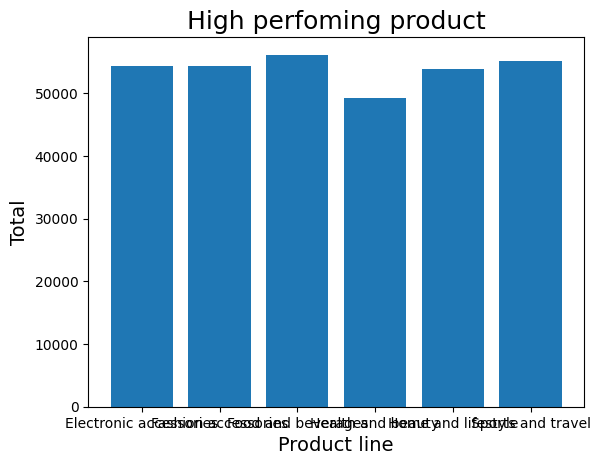

In [23]:

plt.bar(category_sales['Product line'],category_sales['Total'])

plt.rcParams.update({'font.size': 5})

#labels
plt.xlabel('Product line',fontsize = 14)
plt.ylabel('Total',fontsize = 14)
plt.title('High perfoming product',fontsize =18)

plt.show()

**Sales trends**

In [24]:
#total sales

Total_sales= df['Total'].sum()

print(Total_sales)

322966.749


**Quarterly Sales**

<function matplotlib.pyplot.show(close=None, block=None)>

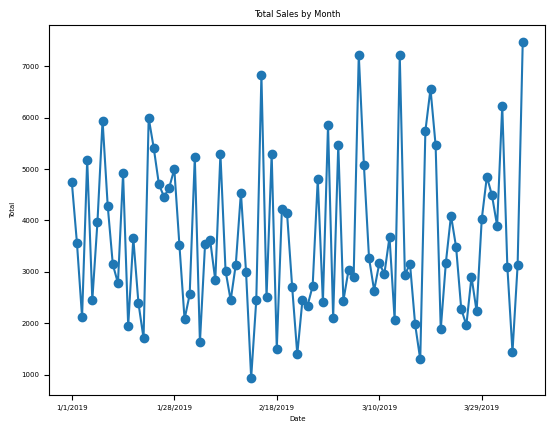

In [25]:
#converting date to datetime format

df['sale_date']=pd.DatetimeIndex(df['Date']).month
month_sales=df.groupby('Date')['Total'].sum()
month_sales.plot(marker='o', linestyle='solid')
plt.title('Total Sales by Month')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show

In [26]:
#which days are most profitable

df['Date']=pd.DatetimeIndex(df['Date']).day_name()

day_profit=df.groupby('Date')['gross margin percentage'].sum()
day_profit

Date
Friday       661.904762
Monday       595.238095
Saturday     780.952381
Sunday       633.333333
Thursday     657.142857
Tuesday      752.380952
Wednesday    680.952381
Name: gross margin percentage, dtype: float64

**SUMMARY & FINDINGS**

1. Analysis has demonstrated that consumer's preferred mode of payment was an e-wallet. This does not mean that the other modes of payment are not utilized in high percentages.
2. According to the data, Naypyidaw does in fact has the highest sales when compared to the other states.3. - Sales are greater from customerwho t are membe.iM; mem'srs' sense of loyalty to the company is reflected in total sal4. sis- The business generates less money at the beginning of the year or first qu. ter…
The first quarter or start of the year saw lower revenue for the y.
5. Deep analysis has shown that othesis-Electronic products generate more revenue compared to other .roducts…
 In terms of revenue, the food and beverages products outperform all the other products.


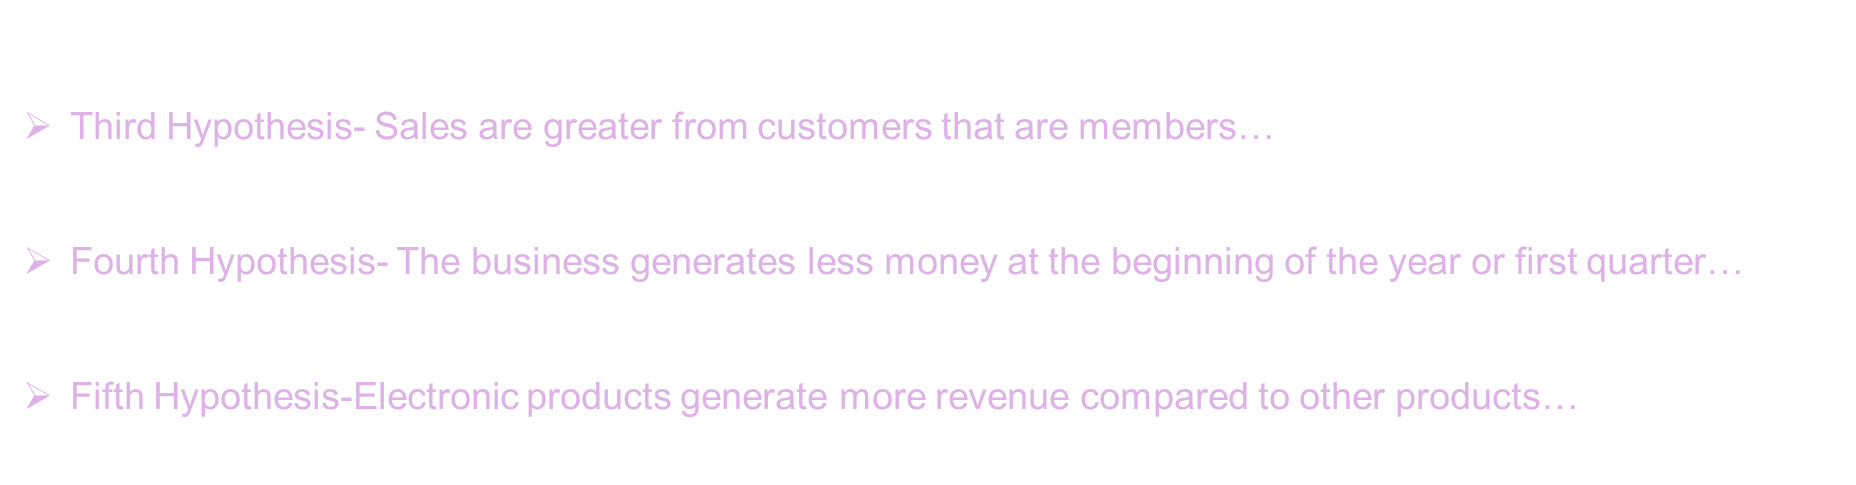
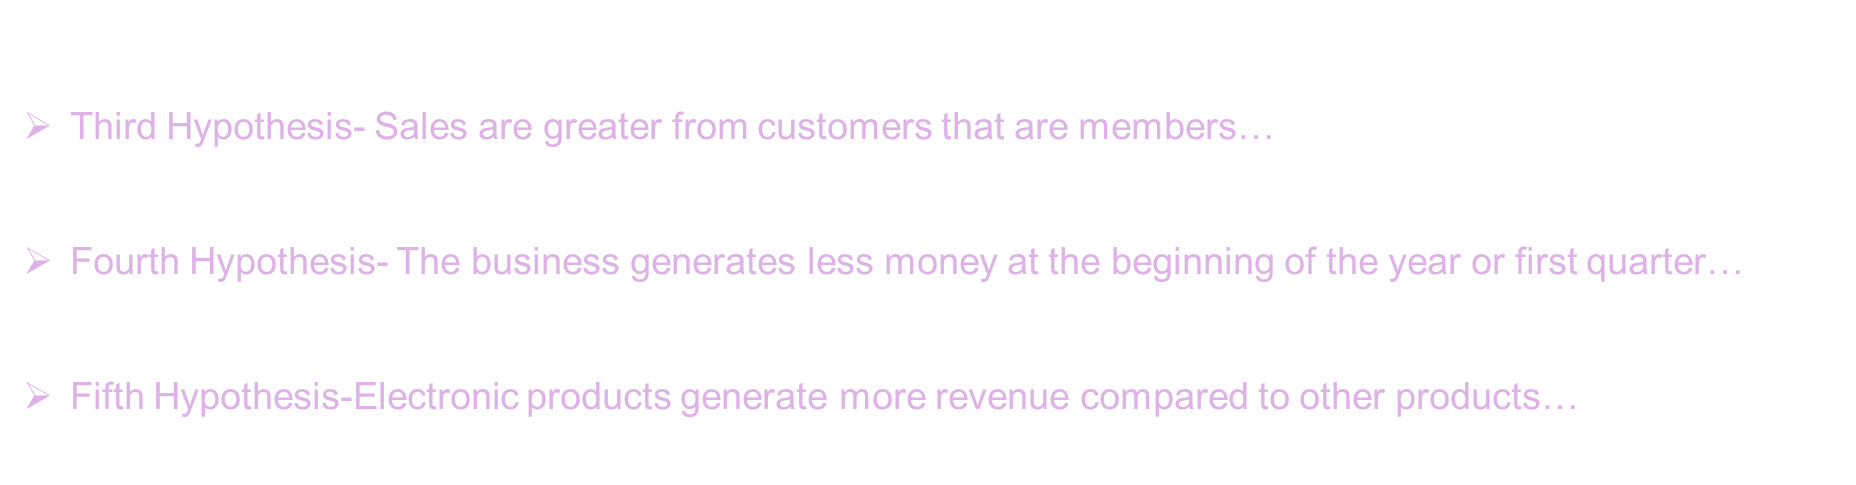
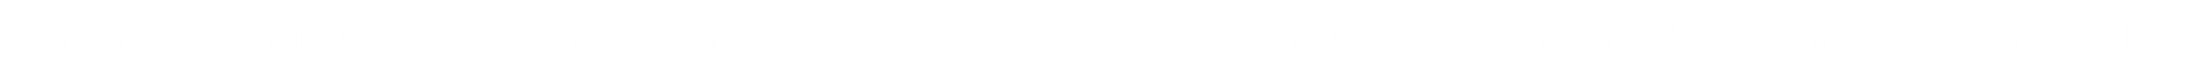
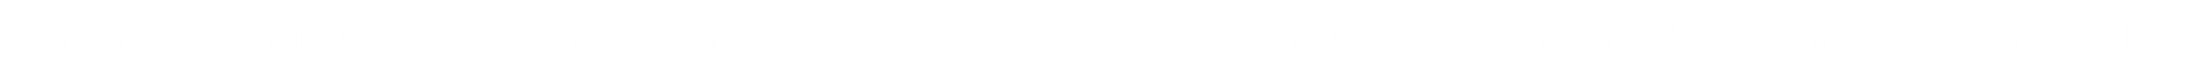
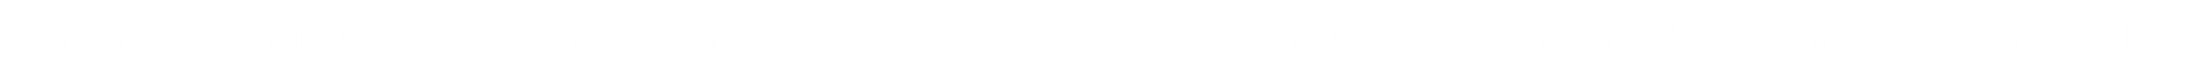
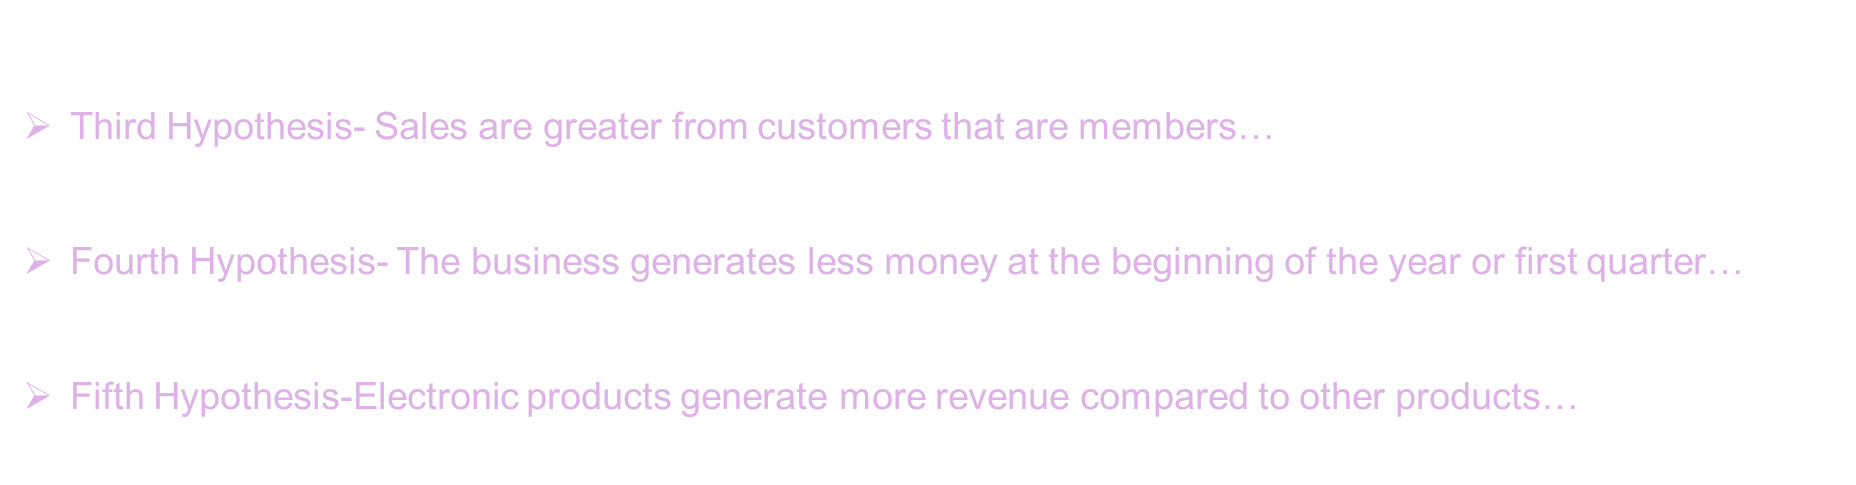
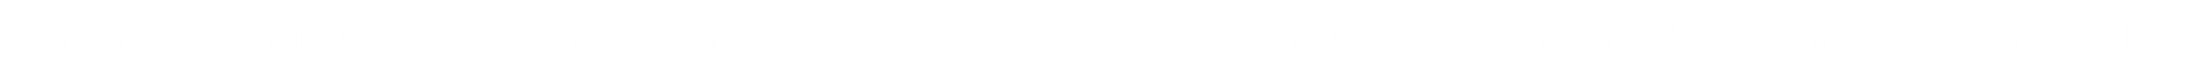
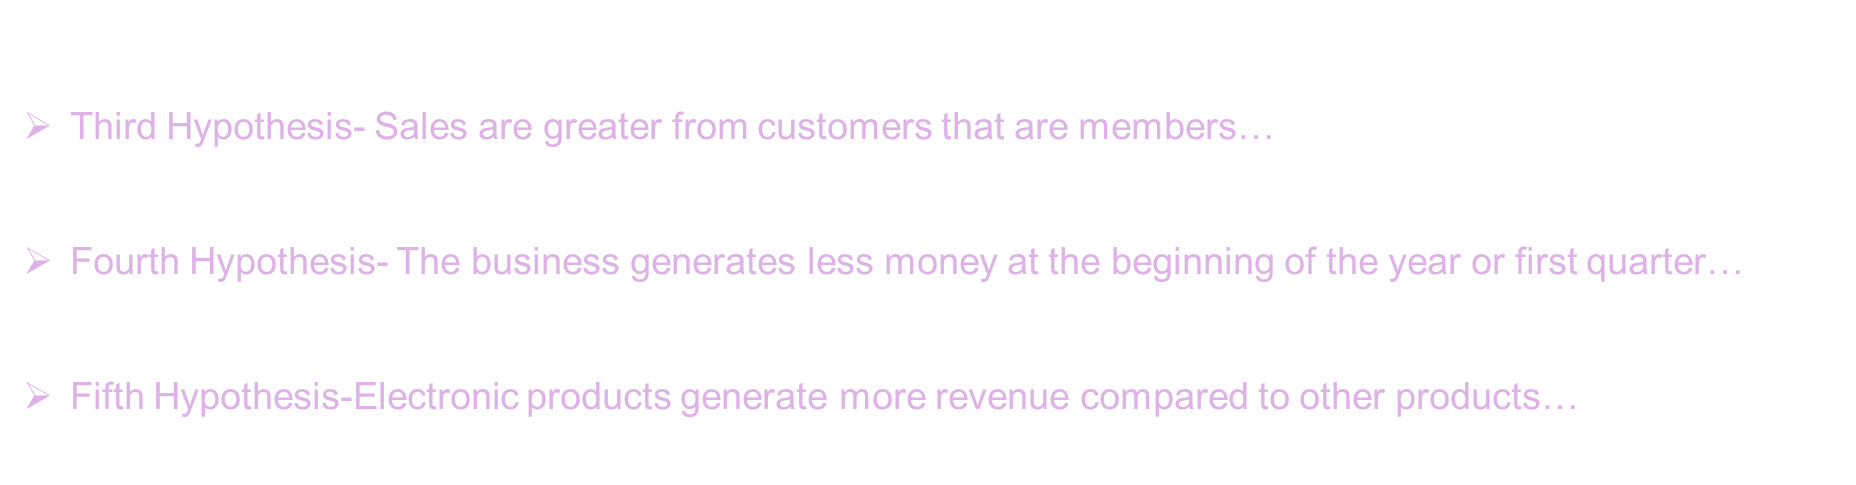